<a href="https://colab.research.google.com/github/silentknight17/Add-User-Notifier/blob/master/Q_Learning_Microgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Total-RD/pymgrid/

  Cloning https://github.com/Total-RD/pymgrid/ to /tmp/pip-req-build-0cjgonbx
  Running command git clone -q https://github.com/Total-RD/pymgrid/ /tmp/pip-req-build-0cjgonbx
  Created wheel for pymgrid: filename=pymgrid-0.1.0-py3-none-any.whl size=3423644 sha256=d1aafc0c0ddbac3244fc25264d985243a1f4bd24bba944b5366f7d19d2176bc3
  Stored in directory: /tmp/pip-ephem-wheel-cache-lotmqbuq/wheels/e5/88/1d/f8d379259639fcb7a25a36c96e2f63e402ce354dde5ece9ce6
Successfully built pymgrid


In [2]:
import sys
from pymgrid import MicrogridGenerator as mg
import matplotlib.pyplot as plt
import numpy as np
import os
import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
env = mg.MicrogridGenerator(nb_microgrid=2)
env.generate_microgrid(verbose= True)
mg0 = env.microgrids[0]
mg1 = env.microgrids[1]


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2
0,960,10,1,0.1,969.60,0.2,236,236,944,0.9,0.2,1,0.02,0,1920,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60363,10,1,0.1,30785.13,0.2,14838,14838,59352,0.9,0.2,1,0.02,1,120726,120726,3.0,1.63555,0.435848,0.045227,67070.0,0.05,0.9,0.4,2.0


In [4]:
#show the microgrids using for loops.
#identify the microgrid architecture
for i in range(env.nb_microgrids):
  print("Microgrids {} architecture: {}".format(int(i), str(env.microgrids[i].architecture)))
  #benchmark 
 # env.microgrids[i].benchmarks.run_benchmarks("rbc")
#  env.microgrids[i].benchmarks.describe_benchmarks()

Microgrids 0 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrids 1 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}


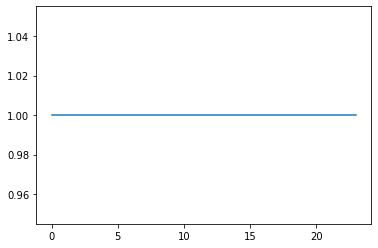

In [5]:
#plot the forecast grid status for microgrid 0
plt.plot(mg0.forecast_grid_status())

In [6]:
#information regarding microgrid 0
mg0.print_info()

Microgrid parameters


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export
0,960,10,1,0.1,969.6,0.2,236,236,944,0.9,0.2,1,0.02,0,1920,1920


Architecture:
{'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Actions: 
dict_keys(['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export'])
Control dictionnary:
['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export']
Status: 
dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge', 'grid_status', 'grid_co2', 'grid_price_import', 'grid_price_export'])
Has run mpc baseline:
False
Has run rule based baseline:
False


In [7]:
mg0.battery.capacity

944

In [8]:
#information regarding microgrid 1
mg1.print_info()

Microgrid parameters


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2
0,60363,10,1,0.1,30785.13,0.2,14838,14838,59352,0.9,0.2,1,0.02,1,120726,120726,3,1.63555,0.435848,0.045227,67070,0.05,0.9,0.4,2


Architecture:
{'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Actions: 
dict_keys(['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export', 'genset'])
Control dictionnary:
['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export', 'genset']
Status: 
dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge', 'grid_status', 'grid_co2', 'grid_price_import', 'grid_price_export'])
Has run mpc baseline:
False
Has run rule based baseline:
False


In [9]:
#calculate the penetration of the microgrid using the formula
#round them off and display
print("Penetration of PV microgrid 0: ", round(mg0.parameters["PV_rated_power"][0]/mg0.parameters["load"][0]*100,2),"%")
print("Penetration of PV microgrid 1: ", round(mg1.parameters["PV_rated_power"][0]/mg1.parameters["load"][0]*100,2),"%")

Penetration of PV microgrid 0:  101.0 %
Penetration of PV microgrid 1:  51.0 %


In [10]:
#calculate net load of microgrid 0
net_load = mg0.load-mg0.pv
#print the current net load
print("Current net load of microgrid 0: {:0.4} kWh".format(net_load) )
print("Current battery capacity of microgrid 0:", mg0.battery.capacity)

Current net load of microgrid 0: 145.6 kWh
Current battery capacity of microgrid 0: 944


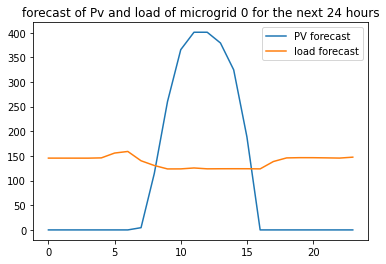

In [11]:
plt.title("forecast of Pv and load of microgrid 0 for the next 24 hours")
mg0.set_horizon(24)
plt.plot(mg0.forecast_pv(), label ="PV forecast")
plt.plot(mg0.forecast_load(), label = "load forecast")
plt.legend()
plt.show()

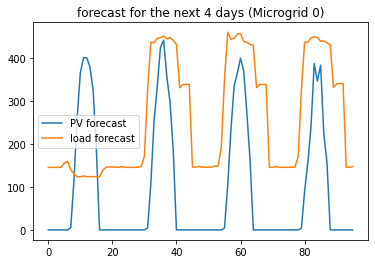

In [12]:
plt.title("forecast for the next 4 days (Microgrid 0)")
#change the horizon time
mg0.set_horizon(24*4)
#dont forget to change back the horizon at the right value afterward

plt.plot(mg0.forecast_pv(), label ="PV forecast")
plt.plot(mg0.forecast_load(), label ="load forecast")
plt.legend()
plt.show()

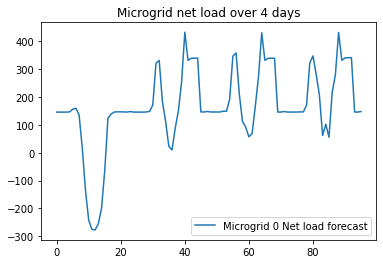

In [13]:
plt.title("Microgrid net load over 4 days")
plt.plot(mg0.forecast_load()-mg0.forecast_pv(), label = "Microgrid 0 Net load forecast")

plt.legend()
plt.show()


In [14]:
mg0.set_horizon(24)
mg1.set_horizon(24)

In [15]:
#to make things simple, the agent can take only one of the 5 actions defined at the full rate of the net_load
mg0.get_control_dict() #show the list of action that can be taken

['load',
 'pv_consummed',
 'pv_curtailed',
 'pv',
 'battery_charge',
 'battery_discharge',
 'grid_import',
 'grid_export']

In [16]:
#action 0: battery_charge
#action 1: battery_discharge
#action 2: grid_import
#action 3: grid_export

def actions_agent(mg0, action):
 
    #initialize the architecture
    pv = mg0.pv
    load = mg0.load
    
    #initialize variable
    net_load = load - pv
    
    capa_to_charge = mg0.battery.capa_to_charge
    p_charge_max = mg0.battery.p_charge_max
    p_charge = max(0,min(-net_load, capa_to_charge, p_charge_max))
    
    capa_to_discharge = mg0.battery.capa_to_discharge
    p_discharge_max = mg0.battery.p_discharge_max
    p_discharge = max(0,min(net_load, capa_to_discharge, p_discharge_max))

    #change control dictionary based on the different scenarios

    #scenario action 0: battery_charge   
    #battery charge set to p_charge
    if action == 0:
        
        if p_charge > 0:
            
        
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': p_charge,
                            'battery_discharge': 0,
                            'grid_import': 0,
                            'grid_export':max(0,pv - min(pv,load) - p_charge)
                           }
        else:
            
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': net_load,
                            'battery_discharge': 0,
                            'grid_import': 0,
                            'grid_export':max(0,pv - min(pv,load) - p_charge)
                           }

            
    #scenario action 1: battery_discharge      
    #battery discharge set to p_discharge
    elif action ==1:
        
        if p_discharge > 0:
        
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': 0,
                            'battery_discharge': p_discharge,
                            'grid_import': max(0,load - min(pv,load) - p_discharge),
                            'grid_export':0
                           }
        else:
            
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': 0,
                            'battery_discharge': net_load,
                            'grid_import': max(0,load - min(pv,load) - p_discharge),
                            'grid_export':0
                           }
    #scenario action 2: grid_import
        #import the net load into the grid
    elif action ==2:
        
        control_dict = {'pv_consummed': min(pv,load),
                        'battery_charge': 0,
                        'battery_discharge': 0,
                        'grid_import': abs(net_load),
                        'grid_export':0
                       }

    #scenario action 3: grid_export
      #export net load out of the grid
    elif action == 3:
        
        control_dict = {'pv_consummed': min(pv,load),
                        'battery_charge': 0,
                        'battery_discharge': 0,
                        'grid_import': 0,
                        'grid_export':abs(net_load)
                       }
    
    return control_dict

In [17]:
def init_qtable(mg0, nb_action):
    #net load is the forecast load - pv
    net_load = mg0.forecast_load() - mg0.forecast_pv()

    #initialize state and q
    state = [] #the states in the q table, the states depends on the action the agent takes
    Q = {} 

    #in range of the minimum net-load and the maximum net-load
    for i in range(int(net_load.min()-1),int(net_load.max()+2)):
        
        #for all battery state of charge level from min to max, round them off and append them to the state
        for j in np.arange(round(mg0.battery.soc_min,1),round(mg0.battery.soc_max+0.1,1),0.1):
            
            j = round(j,1)
            state.append((i,j)) 

    #Initialize Q(s,a) at zero
    for s in state:

        Q[s] = {}

        #for every actions, set the state to 0
        for a in range(nb_action):

            Q[s][a] = 0

    return Q

In [18]:
def epsilon_decreasing_greedy(action, epsilon, nb_action):
  #set p as random
  p = np.random.random()
  #if p value is less than 1-epsilon, set randomm to 0
  if p < (1 - epsilon):
      randomm=0
      return action, randomm
#if p is above 1-epsilon than randomm is true and return the choice of action
  else: 
      randomm=1
      return np.random.choice(nb_action), randomm

In [19]:
def max_dict(d):

    max_key = None
    max_val = float('-inf')


    for k,v in d.items():

        if v > max_val:

            max_val = v
            max_key = k

    return max_key, max_val

In [20]:
def update_epsilon(epsilon):
    #decrease epsilon by 2 percent
    epsilon = epsilon - epsilon *0.02
    
    #if epsilon is smaller than 0.1 , set epsilon to 0.1
    if epsilon < 0.1:
        epsilon = 0.1
    
    return epsilon

In [21]:
def change_name_action(idx):
    
    #action 0: battery_charge
    #action 1: battery_discharge
    #action 2: grid_import
    #action 3: grid_export
    
    if idx == 0:
        
        action_name = "charge"
    elif idx == 1:
        action_name = "discharge"
    elif idx == 2:
        
        action_name = "import"
        
    else:
        
        action_name = "export"
    
    return action_name

In [22]:
def print_welcome(idx):
    
    if idx == 0:
        print("------------------------------------")
        print("|        WELCOME TO PYMGRID        |")
        print("------------------------------------")
    elif idx == 1:
        
        print("t -     STATE  -  ACTION - COST -- Load -- pv -- battery")
        print("==========================================================")

In [23]:
def training_Q_Learning(mg,horizon):
    
    #initialize variables
    nb_action = 4
    Q = init_qtable(mg,nb_action)
    nb_state = len(Q)
    nb_episode = 100
    alpha = 0.1
    epsilon = 0.99
    gamma = 0.99
    
    #initialize
    record_cost = []
    t0 = time.time()
    t = t0
    #start algorithm
    print_training = "Training Progressing .   "
    print_welcome(0)
    print("\n")


    #iterate through every episode with for loop
    for e in range(nb_episode+1):
        
        #if there is no more episodes left, print the vlue and flush
        if e == 0:
            value_print="\rEpisode " + str(e) +"/" + str(nb_episode)
            sys.stdout.write(value_print)
            sys.stdout.flush()
        
        #if there are still episodes
        else:
            
            now = time.time()
            
            #when episode is 1, 50, 100,200,300,400,450, 485, or total declared episode -5
              #calculate the time difference
              #print the total time difference in each episodes
            if e == 1 or e == 50 or e == 100 or e == 200 or e == 300 or e == 400  or e == 450  or e == 485 or e == nb_episode-5:
                diff_time_t = now - t 
                total_time = (nb_episode+1) * diff_time_t
            #identify current time and calculate the number of time remaining
            now = time.time()
            diff_time = now - t0
            time_remaining = total_time - diff_time
            
            t = time.time()
        
        #if episode is the modulus of 10, print training progressing
        if e % 10 == 0:
        
            if print_training == "Training Progressing .   ":
                
                print_training = "Training Progressing ..  "
                
            elif print_training == "Training Progressing ..  ":
            
                print_training = "Training Progressing ... "
            
            else:
                
                print_training = "Training Progressing .   "
        #print the training for each episode
        value_print="\r"+ print_training +"Episode " + str(e) +"/" + str(nb_episode) 
        sys.stdout.write(value_print)
        sys.stdout.flush()
        
        # before begin training in each episode the cost for each episode is reset to 0 and reset the microgrid
        episode_cost = 0
        mg.reset()


        #the state consist of the net load and the state of charge of the battery
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s = (net_load, soc)
        

        #apply the greedy decreasing strategy 
        a = max_dict(Q[s])[0]
        a,randomm = epsilon_decreasing_greedy(a, epsilon, nb_action)
        
        #horizon is the total number of hours we want our agent to go through
        for i in range (horizon):
            #in every hour,
            action = actions_agent(mg,a) #the action of the agent
            status = mg.run(action) #the status is based on the action the agent takes in the microgrid
            r = -mg.get_cost() #reward is subtracted by the cost
            episode_cost += mg.get_cost() #add cost into the amount of cost in the episode
            net_load = round(mg.load - mg.pv) #netload is the microgrid load - pv
            soc = round(mg.battery.soc,1)#state of charge of the battery
            s_ = (net_load, soc) #the state consist of the current net load and the state of charge
            a_ = max_dict(Q[s_])[0] #maximum value in the dictionary is put inside a
            if i == horizon-1: #in the last hour of the training
                Q[s][a] += alpha*(r - Q[s][a]) #calculate the q value 
                #q value = qvalue +alpha *(reward -q-value)
            # if its still not the last hour
            else:
                old_Q = Q[s][a]  
                target = r + gamma*Q[s_][a_] 
                td_error = target - Q[s][a]
                Q[s][a] = (1-alpha) * Q[s][a] + alpha * td_error
            s, a = s_, a_
        epsilon = update_epsilon(epsilon)
    return Q

In [24]:
def training_Q_Learning(mg,horizon):
    
    nb_action = 4
    Q = init_qtable(mg,nb_action)
    nb_state = len(Q)
    nb_episode = 100
    alpha = 0.1
    epsilon = 0.99
    gamma = 0.99
    
    record_cost = []
    t0 = time.time()
    t = t0
    print_training = "Training Progressing .   "
    print_welcome(0)
    print("\n")
    for e in range(nb_episode+1):
        
        if e == 0:
            value_print="\rEpisode " + str(e) +"/" + str(nb_episode)
            sys.stdout.write(value_print)
            sys.stdout.flush()
        
        else:
            
            now = time.time()
            
            if e == 1 or e == 50 or e == 100 or e == 200 or e == 300 or e == 400  or e == 450  or e == 485 or e == nb_episode-5:
                diff_time_t = now - t 
                total_time = (nb_episode+1) * diff_time_t
            
            now = time.time()
            
            diff_time = now - t0
            time_remaining = total_time - diff_time
            
            t = time.time()
        
        if e % 10 == 0:
        
            if print_training == "Training Progressing .   ":
                
                print_training = "Training Progressing ..  "
                
            elif print_training == "Training Progressing ..  ":
            
                print_training = "Training Progressing ... "
            
            else:
                
                print_training = "Training Progressing .   "

        value_print="\r"+ print_training +"Episode " + str(e) +"/" + str(nb_episode) 
        sys.stdout.write(value_print)
        sys.stdout.flush()
            
        episode_cost = 0
        mg.reset()
        
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s = (net_load, soc)
        
        a = max_dict(Q[s])[0]
        a,randomm = epsilon_decreasing_greedy(a, epsilon, nb_action)
        
        
        for i in range (horizon):
            
            
            action = actions_agent(mg,a)
            status = mg.run(action)
            r = -mg.get_cost() 
            episode_cost += mg.get_cost()
            net_load = round(mg.load - mg.pv)
            soc = round(mg.battery.soc,1)
            s_ = (net_load, soc)
            a_ = max_dict(Q[s_])[0]
            
            if i == horizon-1:
                
                Q[s][a] += alpha*(r - Q[s][a])
      
            else:
             
                old_Q = Q[s][a]
                target = r + gamma*Q[s_][a_]
                td_error = target - Q[s][a]
                Q[s][a] = (1-alpha) * Q[s][a] + alpha * td_error
                
            s, a = s_, a_
       
        epsilon = update_epsilon(epsilon)
        
    return Q

In [25]:
def testing_Q_Learning(mg, Q,horizon):
    #test the q leaarning function
    #reset everything back to normal first
    mg.reset()
    net_load = round(mg.load - mg.pv)
    soc = round(mg.battery.soc,1)
    s = (net_load, soc)
    a = max_dict(Q[s])[0]
    total_cost = 0
    print_welcome(1)
    #initiate the training
    for i in range (horizon):
        action_name = change_name_action(a) #a is just a number, we change the number into an action so that 
        #this is so that we know on each time-step, what action did the agent take
        action = actions_agent(mg, a)
        status = mg.run(action)
        cost = mg.get_cost()
        load =mg.load
        pv_gen = mg.pv
        battery_capacity =mg.battery.capacity 
        total_cost += cost
        if i < 10:
            print(i," -",(int(net_load),soc),action_name, round(total_cost,1), "€", round(load,1), round(pv_gen,1),round(battery_capacity,1))
        else:
            print(i," -",(int(net_load),soc),action_name, round(total_cost,1), "€", round(load,1), round(pv_gen,1),round(battery_capacity,1))
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s_ = (net_load, soc)
        a_ = max_dict(Q[s_])[0]

        s, a = s_, a_

In [26]:
Q1 = training_Q_Learning(mg0,24)

------------------------------------
|        WELCOME TO PYMGRID        |
------------------------------------


Training Progressing ... Episode 100/100

In [27]:
testing_Q_Learning(mg0,Q1, 24)

t -     STATE  -  ACTION - COST -- Load -- pv -- battery
0  - (146, 0.2) discharge 34.7 € 145.6 0.0 944
1  - (146, 0.2) discharge 69.4 € 145.6 0.0 944
2  - (146, 0.2) discharge 104.2 € 145.5 0.0 944
3  - (146, 0.2) discharge 139.0 € 146.1 0.0 944
4  - (146, 0.2) discharge 173.6 € 155.9 0.0 944
5  - (156, 0.2) import 210.2 € 159.1 0.0 944
6  - (159, 0.2) discharge 247.4 € 140.2 4.5 944
7  - (136, 0.2) import 279.2 € 130.6 114.3 944
8  - (16, 0.2) discharge 284.2 € 123.7 260.3 944
9  - (-137, 0.2) discharge 284.2 € 123.8 365.5 944
10  - (-242, 0.2) discharge 284.2 € 125.6 400.9 944
11  - (-275, 0.2) discharge 284.2 € 123.9 400.9 944
12  - (-277, 0.2) discharge 284.2 € 124.1 379.1 944
13  - (-255, 0.2) discharge 284.2 € 124.1 324.7 944
14  - (-201, 0.2) discharge 284.2 € 124.1 188.7 944
15  - (-65, 0.2) discharge 284.2 € 123.8 0.0 944
16  - (124, 0.2) import 359.1 € 138.7 0.0 944
17  - (139, 0.2) discharge 443.0 € 146.1 0.0 944
18  - (146, 0.2) discharge 487.6 € 146.5 0.0 944
19  - (147, 

In [28]:
mg0.print_load_pv()

Load


PV


In [29]:
#check penalty
#todo verbose
def penalty(self, coef = 1):
    """Penalty that represents discrepancies between control dict and what really happens. """
    penalty = 0
    for i in self._df_record_control_dict:
        penalty += abs(self._df_record_control_dict[i][-1] - self._df_record_actual_production[i][-1])

    return penalty*coef

In [30]:
mg0.print_control()

In [31]:
mg0.grid